**S**upport **V**ector **M**achine **(SVM)**

In diesem notebook wird die Support-Vector-Machine vorgestellt.
Die SVM wird auf Daten aus den integrierten Datensätzen ['make_blob'](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make_blobs#sklearn.datasets.make_blobs) und ['make_circle'](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles) angewendet.


Support Vector Machines (SVMs) sind eine Reihe von überwachten Lernmethoden, die für [Klassifizierung](https://scikit-learn.org/stable/modules/svm.html#svm-classification), [Regression](https://scikit-learn.org/stable/modules/svm.html#svm-regression) und [Ausreißererkennung](https://scikit-learn.org/stable/modules/svm.html#svm-outlier-detection) eingesetzt werden kann.

Die folgenden Beispiele zeigen einige Klassifizierungsfälle.

[Beispiel_1](#Beispiel_1) : linear trennbare Daten<br>
[Beispiel_2](#Beispiel_2) : nicht trennbare Daten<br>
[Beispiel_3](#Beispiel_3) : Nichtlineare Daten und lineare Trennung<br>
[Beispiel_4](#Beispiel_4) : Nichtlineare Daten und Polynomtrennung<br>
[Beispiel_5](#Beispiel_5) : SVM mit Sigmoid-Kernel<br>
[Beispiel_6](#Beispiel_6) : SVM radialer Basisfunktion<br>

---

<a id="example_1"> **Beispiel_1:** </a><br>linear trennbare Daten:

Eine SVM konstruiert eine Hyperebene oder einen Satz von Hyperebenen in einem Raum mit hohen oder unendlichen Dimensionen, die für die Klassifizierung, Regression oder andere Aufgaben verwendet werden können. Intuitiv wird eine gute Trennung durch die Hyperebene erreicht, die den größten Abstand zu den nächsten Trainingsdatenpunkten einer Klasse aufweist (sogenannter Funktionsspielraum), da im Allgemeinen der Generalisierungsfehler des Klassifikators umso geringer ist, je größer der Spielraum ist.
Proben an den Randgrenzen werden als "Unterstützungsvektoren" bezeichnet:

Datensatzparameter ([make_blob](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make_blobs#sklearn.datasets.make_blobs)):
- nSamples = 800: $\quad$ Gesamtzahl der Punkte, die gleichmäßig auf die Cluster verteilt sind.
- rndState = 6: $\quad$Bestimmt die Zufallszahlengenerierung für die Datensatzerstellung. Übergeben Sie ein int für die reproduzierbare Ausgabe über mehrere Funktionsaufrufe.

Modellparameter ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) and [linearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)):
- Kernel = 'linear'
- C = 100: $\quad$ Regularisierungsparameter. Die Stärke der Regularisierung ist umgekehrt proportional zu C. Muss positiv sein. Das Limit ist ein quadratisches l2-Limit.

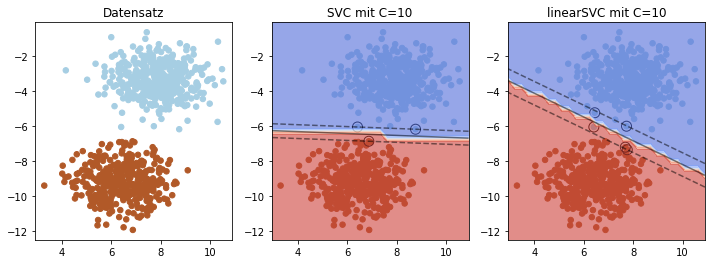

In [1]:
# code basiert auf folgende Beispiele:
# https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html#sphx-glr-auto-examples-svm-plot-linearsvc-support-vectors-py
# und
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
from numpy import meshgrid, linspace, c_, where
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
#
#
import warnings
warnings.filterwarnings('ignore')
#
n_samples = 800
rnd_state = 6
#
kernel = 'linear'
C = 10
#
# Datensatz mit nSample-Punkten erstellen
#
X, y = make_blobs(n_samples=n_samples, centers=2, random_state=rnd_state)
#
# Instanz einer SVC erstellen und mit Daten ausstatten. Die Daten werden nicht skaliert, 
# da die Unterstützungsvektoren angezeigt werden sollen.
#
svc= SVC(kernel=kernel, C=C)
svc.fit(X, y)
#
#
nCols = 3 # Anzahl der Diagramme in einer Reihe
fig, ax = plt.subplots(ncols=nCols, nrows=1, figsize=(12,4))
#
# ursprünglichen Datensatz in alle Diagramme zeichnen
#
for i in range(nCols):
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
#
# Netzgitter zum Auswerten des Models erstellen
# Gittergröße: (h,h)
#
h = 30
#
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
xx, yy = meshgrid(linspace(xlim[0], xlim[1], h), linspace(ylim[0], ylim[1], h))
#
# ravel(): die Gittermatrix in einen Zeilenvektor transformieren
# np.c_ gibt einen Spaltenvektor zurück. Hier hat der Spaltenvektor die Größe (30x30, 2)
#
# decision_function() gibt die Entscheidungsfunktion der Stichprobe für jede Klasse im Modell zurück. 
#
Z = svc.decision_function(c_[xx.ravel(), yy.ravel()])
#
# Umformung der Entscheidungsfunktion vom Spaltenvektor auf die Größe des Maschengitters
# -> von der Form(h*h,) zu (h,h)
#
Z = Z.reshape(xx.shape)
#
# plot Entscheidungsfunktion und Ränder
#
ax[1].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
#
ax[1].scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#
# Entscheidungsgrenze als farbigen Bereich einzeichnen. Dazu weisen wir jeder Entscheidungsgrenze eine Farbe
# im Netzgitter zu
#
ca = svc.predict(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax[1].contourf(xx, yy, ca, cmap=plt.cm.coolwarm, alpha=0.6)
#
# ------------------------------------------------------------------------------------------------------------------
# Ergebnis mit LinearSVC
#
# Instanz einer LinearSVC erstellen und mit Daten ausstatten.
#
linSVC = LinearSVC(C=C, loss="hinge", random_state=6).fit(X, y)
#
# in linearSVC muss man einen etwas anderen Weg gehen, um die Stützvektoren zu erhalten, 
# da es keine Variable 'support_vectors_' gibt
#
# die Unterstützungsvektoren über die Entscheidungsfunktion erhalten:
#
decision_function = linSVC.decision_function(X)
support_vector_indices = where((2 * y - 1) * decision_function <= 1)[0]
support_vectors = X[support_vector_indices]
#
# Entscheidungsfunktionen von LinearSVC
#
Z1 = linSVC.decision_function(c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
#
# plot Entscheidungsfunktion und Ränder
#
ax[2].contour(xx, yy, Z1, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
ax[2].scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
#
# Entscheidungsgrenze als farbigen Bereich darstellen.
#
ca = linSVC.predict(c_[xx.ravel(), yy.ravel()])
ca = ca.reshape(xx.shape)
#
# die zugewiesene Farbe jedes Punktes in ein Farbdiagramm setzen#
#
ax[2].contourf(xx, yy, ca, cmap=plt.cm.coolwarm, alpha=0.6)
#
ax[0].set_title("Datensatz")
ax[1].set_title("SVC mit C=" + str(C))
ax[2].set_title("linearSVC mit C=" + str(C))
#
plt.show()

<a id="example_2">**Beispiel_2:**</a><br>nicht separierbare Daten:


dataset parameter ([make_blob](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make_blobs#sklearn.datasets.make_blobs)):
- nSamples = 800: Gesamtzahl der Punkte, die gleichmäßig auf die Cluster verteilt sind.
- rndState = 4: Bestimmt die Zufallszahlengenerierung für die Datensatzerstellung. Übergeben Sie ein int für die reproduzierbare Ausgabe über mehrere Funktionsaufrufe.

model parameter ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) and [linearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)):
- kernel = 'linear'
- C = 100: Regularisierungsparameter. Die Stärke der Regularisierung ist umgekehrt proportional zu C. Muss positiv sein. Das Limit ist ein quadratisches l2-Limit.

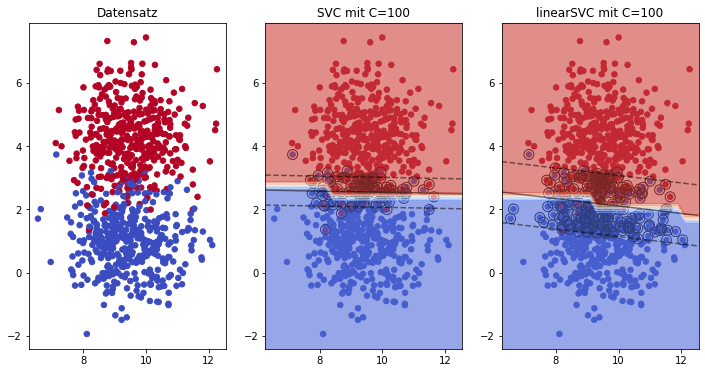

In [2]:
# code basiert auf folgende Besispiele:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# und
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
from numpy import meshgrid, linspace, c_, where
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
#
#
nSamples = 800
rndState = 4
#
kernel = 'linear'
C = 100
#
# Datensatz mit nSample-Punkten erstellen
#
X, y = make_blobs(n_samples=nSamples, centers=2, random_state=rndState)
#
# Instanz einer SVC erstellen und mit Daten ausstatten. die Daten werden nicht skaliert, 
# da die Unterstützungsvektoren gezeigt werden sollen.
#
svc = SVC(kernel=kernel, C=C)
svc.fit(X, y)
#
#
nCols = 3  # Anzahl der Diagramme in einer Reihe
fig, ax = plt.subplots(ncols=nCols, nrows=1, figsize=(12,6))
#
# ursprünglichen Datensatz in alle Diagramme zeichnen
#
for i in range(nCols):
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm)
#
# Netzgitter zum Auswerten des Models erstellen
# Gittergröße: (h,h)
#
h = 30
#
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
xx, yy = meshgrid(linspace(xlim[0], xlim[1], h), linspace(ylim[0], ylim[1], h))
#
# decision_function() gibt die Entscheidungsfunktion der Stichprobe für jede Klasse im Modell zurück. 
#
Z = svc.decision_function(c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#
# plot Entscheidungsfunktion und Ränder
#
ax[1].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
#
# plot support vectors
#
ax[1].scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#
# Entscheidungsgrenze als farbigen Bereich darstellen. Dazu weisen wir jeder Entscheidungsgrenze eine Farbe
# im Netzgitter zu
#
ca = svc.predict(c_[xx.ravel(), yy.ravel()])
ca = ca.reshape(xx.shape)
#
# die zugewiesene Farbe jedes Punktes in ein Farbdiagramm setzen
#
ax[1].contourf(xx, yy, ca, cmap=plt.cm.coolwarm, alpha=0.6)
#
#----------------------------------------------------------
# Ergebnis mit LinearSVC
#
linSVC = LinearSVC(C=C, loss="hinge").fit(X,y)
#
# Entscheidungsfunktion von linearSVC
#
ZlinSVC = linSVC.decision_function(c_[xx.ravel(), yy.ravel()])
ZlinSVC = ZlinSVC.reshape(xx.shape)
#
# die Unterstützungsvektoren über die Entscheidungsfunktion erhalten
#
decision_function = linSVC.decision_function(X)
support_vector_indices = where((2 * y - 1) * decision_function <= 1)[0]
support_vectors = X[support_vector_indices]
#
# Entscheidungsfunktion anzeigen
#
ax[2].contour(xx,yy, ZlinSVC, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
#
# Unterstützungsvektoren als kreisförmig markierte Punkte einzeichnen
#
ax[2].scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
#
# Entscheidungsgrenze als farbigen Bereich darstellen. Dazu weisen wir jeder 
# Entscheidungsgrenze eine Farbe im Netzgitter zu
# 
calinSVC = linSVC.predict(c_[xx.ravel(), yy.ravel()])
calinSVC = calinSVC.reshape(xx.shape)
#
# die zugewiesene Farbe jedes Punktes in ein Farbdiagramm setzen
#
ax[2].contourf(xx,yy, calinSVC, cmap=plt.cm.coolwarm, alpha=0.6)
#
ax[0].set_title("Datensatz")
ax[1].set_title("SVC mit C=" + str(C))
ax[2].set_title("linearSVC mit C=" + str(C))
#
plt.show()

<a id="example_3"> **Beispiel_3:** </a><br>nicht-liinearer Datensatz:

Den kreisförmigen Datensatz mit einer linearen SVM klassifizieren.

dataset parameter  ([make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles)):
- nSamples = 250:$\quad$ Gesamtzahl der Punkte, die gleichmäßig auf die Cluster verteilt sind.
- noise = 0.1: $\qquad$ Standardabweichung des zu den Daten hinzugefügten Gaußschen Rauschens.
- factor = 0.4 $\qquad$ Skalierungsfaktor zwischen innerem und äußerem Kreis. $0<factor<1$

model parameter ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) and [linearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)):
- kernel = 'linear'
- C = 100: $\quad$ Regularisierungsparameter. Die Stärke der Regularisierung ist umgekehrt proportional zu C. Muss positiv sein. Das Limit ist ein quadratisches l2-Limit.

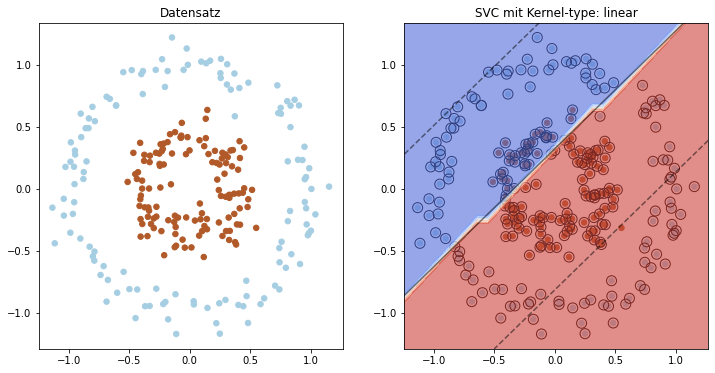

In [3]:
# code basiert auf den folgenden Beispielen:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# und
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
from numpy import meshgrid, c_, linspace, where
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn.svm import SVC
import matplotlib.pyplot as plt
#
#
nSamples = 250
noise = 0.1
factor = 0.4
#
kernel = 'linear'
C = 100
#
# Datensatz mit nSample-Punkten erstellen
#
X, y = make_circles(n_samples=nSamples, factor=factor, noise=noise)
#
# Instanz einer SVC erstellen und mit Daten ausstatten. Die Daten werden nicht skaliert, 
# da die Unterstützungsvektoren angezeigt werden sollen.
#
svc = SVC(kernel=kernel, C=C)
svc.fit(X, y)
#
#
nCols =2 # Anzahl der Diagramme in einer Reihe
fig, ax = plt.subplots(ncols=nCols, nrows=1, figsize=(12,6))
#
# ursprünglichen Datensatz in alle Diagramme zeichnen
#
for i in range(nCols):
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#
# Netzgitter zum Auswerten des Models erstellen
# Gittergröße: (h,h)
#
h = 30
#
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
xx, yy = meshgrid(linspace(xlim[0], xlim[1], h), linspace(ylim[0], ylim[1], h))
#
# decision_function() gibt die Entscheidungsfunktion der Stichprobe für jede Klasse im Modell zurück.
#
Z = svc.decision_function(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#
# plot Entscheidungsfunktion und Ränder
#
ax[1].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax[1].scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#
# Entscheidungsgrenze als farbigen Bereich darstellen. Dazu weisen wir jeder Entscheidungsgrenze eine Farbe
# im Netzgitter zu
#
ca = svc.predict(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#
# die zugewiesene Farbe jedes Punktes in ein Farbdiagramm setzen
#
ax[1].contourf(xx, yy, ca, cmap=plt.cm.coolwarm, alpha=0.6)
#
ax[0].set_title("Datensatz")
ax[1].set_title("SVC mit Kernel-type: " + str(kernel))
plt.show()

<a id="example_4"> **Beispiel_4:** </a><br>nicht-linearer Datensatz:

Nicht-Linearen Datensatz mit 'make-circle' erstellen und versuchen mit einer polynomen SVM zu klassifizieren.

dataset parameter  ([make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles)):
- nSamples = 250:$\quad$ Gesamtzahl der Punkte, die gleichmäßig auf die Cluster verteilt sind.
- noise = 0.1: $\qquad$ Standardabweichung des zu den Daten hinzugefügten Gaußschen Rauschens.
- factor = 0.4 $\qquad$ Skalierungsfaktor zwischen innerem und äußerem Kreis. $0<factor<1$

model parameter ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) and [linearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)):
- kernel = 'linear'
- C = 100: $\quad$ Regularisierungsparameter. Die Stärke der Regularisierung ist umgekehrt proportional zu C. Muss positiv sein. Das Liimit ist ein quadratisches l2-Limit.
- degree = 3 $\quad$ Grad der polynomischen Kernfunktion ('poly'). Wird von allen anderen Kernen ignoriert.
- gamma = [1, 0,001] $\quad$ Kernel-Koeffizient für 'rbf', 'poly' und 'sigmoid'.

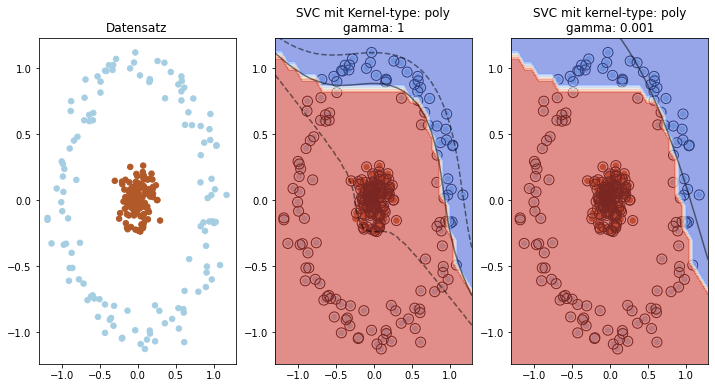

In [4]:
# code basiert auf folgende Beispiele:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# und
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
from numpy import meshgrid, linspace, c_, where
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn.svm import SVC
import matplotlib.pyplot as plt
#
#
nSamples = 250
noise = 0.1
factor = 0.1
#
kernel = 'poly'
C = 100
degree = 3
gamma = [1, 0.001]
#
# Datensatz mit nSample-Punkten erstellen
#
X, y = make_circles(n_samples=nSamples, factor=factor, noise=noise)
#
# 2 Instanzen der SVC erstellen und mit Daten ausstatten. Die Daten werden nicht skaliert, 
# da die Unterstützungsvektoren angezeigt werden sollen.
# 1. mit gamma[0]
polySVC1 = SVC(kernel=kernel, C=C, degree=degree, gamma=gamma[0])
polySVC1.fit(X, y)
# 2. mit gamma[1]
polySVC2 = SVC(kernel=kernel, C=C, degree=degree, gamma=gamma[1])
polySVC2.fit(X, y)
#
nCols = 3 # Anzahl der Diagramme in einer Reihe
fig, ax = plt.subplots(ncols=nCols, nrows=1, figsize=(12,6))
#
# ursprünglichen Datensatz in alle Diagramme zeichnen
#
for i in range(nCols):
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
#
# Netzgitter zum Auswerten des Models erstellen
# Gittergröße: (h,h)
h = 30
#
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
xx, yy = meshgrid(linspace(xlim[0], xlim[1], h), linspace(ylim[0], ylim[1], h))
#
# Entscheidungsfunktionen und Ränder mit Hilfe des models bestimmen
#
Z1 = polySVC1.decision_function(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z2 = polySVC2.decision_function(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#
#
# Entscheidungsfunktion und Ränder darstellen
#
ax[1].contour(xx, yy, Z1, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax[2].contour(xx, yy, Z2, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax[1].scatter(polySVC1.support_vectors_[:, 0], polySVC1.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
ax[2].scatter(polySVC2.support_vectors_[:, 0], polySVC2.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#
# Entscheidungsgrenze als farbigen Bereich darstellen. Dazu weisen wir jeder Entscheidungsgrenze eine Farbe
# im Netzgitter zu
#
ca_1 = polySVC1.predict(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ca_2 = polySVC1.predict(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#
# die zugewiesene Farbe jedes Punktes in ein Farbdiagramm setzen
#
ax[1].contourf(xx, yy, ca_1, cmap=plt.cm.coolwarm, alpha=0.6)
ax[2].contourf(xx, yy, ca_2, cmap=plt.cm.coolwarm, alpha=0.6)
#
ax[0].set_title("Datensatz")
ax[1].set_title("SVC mit Kernel-type: " + str(kernel) + "\ngamma: " + str(gamma[0]))
ax[2].set_title("SVC mit kernel-type: " + str(kernel) + "\ngamma: " + str(gamma[1]))
#
plt.show()

<a id="example_5"> **Beispiel_5:** </a><br>SVM mit Sigmoid-Kernel

Datensatzparameter ([make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles)):
- nSamples = 250 $\quad$ Gesamtzahl der generierten Punkte.
- Rauschen = 0,1 $\qquad$ Standardabweichung des zu den Daten hinzugefügten Gaußschen Rauschens.
- Faktor = 0,4 $\qquad$Skalierungsfaktor zwischen innerem und äußerem Kreis. $0<factor<1$

Modellparameter ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)):
- Kernel = 'Sigmoid'
- C = 100: $\quad$ Regularisierungsparameter. Die Stärke der Regularisierung ist umgekehrt proportional zu C. Muss streng positiv sein. Die Strafe ist eine quadratische l2-Strafe.
- degree = 3 $\quad$ Grad der Polynomkernfunktion ("Poly"). Von allen anderen Kerneln ignoriert.
- gamma = [1, 0,001] $\quad$ Kernel-Koeffizient für "rbf", "poly" und "sigmoid".

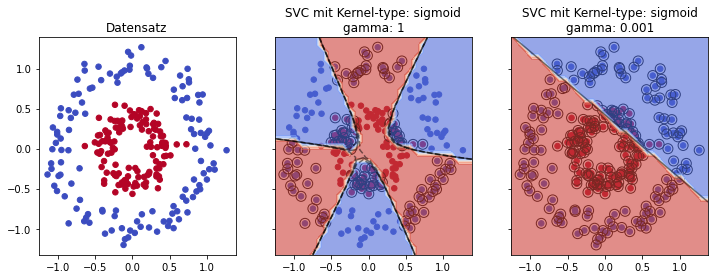

In [5]:
# code basiert auf folgenden Beispielen:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# and
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
from numpy import meshgrid, linspace, c_, where
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn.svm import SVC
import matplotlib.pyplot as plt
#
#
nSamples = 250
noise = 0.1
factor = 0.4
#
kernel = 'sigmoid'
C = 100
degree = 3
gamma = [1, 0.001]
#
# Datensatz mit nSample-Punkten erstellen
#
X, y = make_circles(n_samples=nSamples, factor=factor, noise=noise)
#
# 2 Instanzen einer polynomialen SVC erstellen und mit Daten ausstatten. Die Daten werden nicht skaliert, 
# da die Unterstützungsvektoren angezeigt werden sollen.
# 1. mit gamma[0]
clf_0 = SVC(kernel=kernel, C=C, degree=degree, gamma = gamma[0])
clf_0.fit(X, y)
# 2. mit gamma[1]
clf_1 = SVC(kernel=kernel, C=C, degree=degree, gamma = gamma[1])
clf_1.fit(X, y)
#
#
nCols = 3 #Anzahl der Diagramme in einer Reihe
fig, ax = plt.subplots(ncols=nCols, nrows=1, figsize=(12,4), sharey='all')
#
# ursprüngliche Daten in jedes Diagramm zeichnen
#
for i in range(nCols):
    ax[i].scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.coolwarm)

# Netzgitter zum Auswerten des Models erstellen
# Gittergröße: (h,h)
#
h = 30
#
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
xx, yy = meshgrid(linspace(xlim[0], xlim[1], h), linspace(ylim[0], ylim[1], h))
#
# Entscheidungsfunktionen und Ränder bestimmen
#
Z0 = clf_0.decision_function(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z1 = clf_1.decision_function(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#
# Entscheidungsgrenzen und Ränder darstellen
#
ax[1].contour(xx, yy, Z0, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax[2].contour(xx, yy, Z1, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax[1].scatter(clf_0.support_vectors_[:, 0], clf_0.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
ax[2].scatter(clf_1.support_vectors_[:, 0], clf_1.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#
# Entscheidungsgrenze als farbigen Bereich darstellen. Dazu weisen wir jeder Entscheidungsgrenze eine Farbe
# im Netzgitter zu
#
ca_0 = clf_0.predict(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ca_1 = clf_1.predict(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#
# die zugewiesene Farbe jedes Punktes in ein Farbdiagramm setzen
ax[1].contourf(xx, yy, ca_0, cmap=plt.cm.coolwarm, alpha=0.6)
ax[2].contourf(xx, yy, ca_1, cmap=plt.cm.coolwarm, alpha=0.6)
#
#
ax[0].set_title("Datensatz")
ax[1].set_title("SVC mit Kernel-type: " + str(kernel) + "\ngamma: " + str(gamma[0]))
ax[2].set_title("SVC mit Kernel-type: " + str(kernel) + "\ngamma: " + str(gamma[1]))
#
plt.show()

<a id="example_6"> **Beispiel_6:** </a><br>SVM mit radialer Basisfunktion

**6.1:** <br> 3-dimensionale Visualisierung des Kreis-Datensatzes

Datensatzparameter ([make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles)):
- nSamples = 250 $\quad$ Gesamtzahl der generierten Punkte.
- Rauschen = 0,1 $\qquad$ Standardabweichung des zu den Daten hinzugefügten Gaußschen Rauschens.
- Faktor = 0,4 $\qquad$ Skalierungsfaktor zwischen innerem und äußerem Kreis. $0<factor<1$


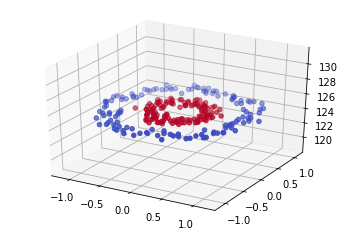

In [6]:
# code basiert auf folgenden Beispielen:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# und
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
from numpy import meshgrid, linspace, c_, exp, sum
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn.svm import SVC
import matplotlib.pyplot as plt
#
from mpl_toolkits.mplot3d import Axes3D
#
#
nSamples = 250
noise = 0.1
factor = 0.4
#
kernel = 'poly'
C = 1000
degree = 3
gamma = [0.3, 0.001]
#
# Datensatz mit nSample-Punkten erstellen
#
X, y = make_circles(n_samples=nSamples, factor=factor, noise=noise)
#
# eine dritte Dimenstion'r' aus den Datenpunkten erzeugen, da der Datensatz grundsätzlich 2-dimensional ist:
#
r = sum(y)
#
nCols = 1 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
# Diagramm anzeigen
ax.scatter(X[:,0], X[:,1], r, c=y, cmap=plt.cm.coolwarm)
#

**6.2**<br>
Kernel trick mit radialer Basisfunktion (rbf)

Datensatzparameter ([make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles)):
- nSamples = 250 $\quad$ Gesamtzahl der generierten Punkte.
- Rauschen = 0,1 $\qquad$ Standardabweichung des zu den Daten hinzugefügten Gaußschen Rauschens.
- Faktor = 0,4 $\qquad$Skalierungsfaktor zwischen innerem und äußerem Kreis. $0<factor<1$

Modellparameter ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)):
- Kernel = 'rbf'
- C = 100: $\quad$ Regularisierungsparameter. Die Stärke der Regularisierung ist umgekehrt proportional zu C. Muss streng positiv sein. Die Strafe ist eine quadratische l2-Strafe.
- degree = 3 $\quad$ Grad der Polynomkernfunktion ("Poly"). Von allen anderen Kerneln ignoriert.
- gamma = 0,1 $\quad$ Kernel-Koeffizient für "rbf", "poly" und "sigmoid".

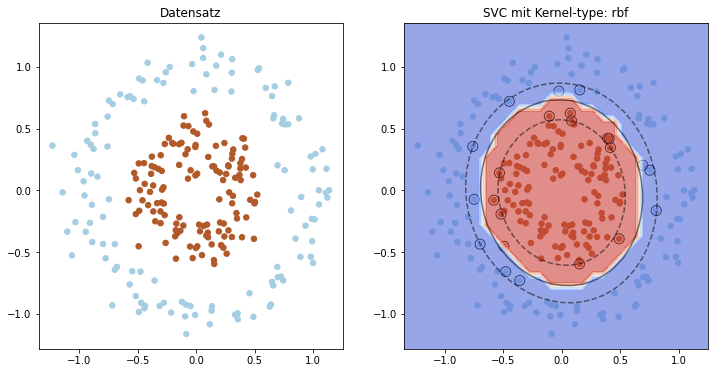

In [7]:
# code based on the example:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# and
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
from numpy import meshgrid, linspace, c_
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#
#
nSamples = 250
noise = 0.1
factor = 0.4
#
kernel = 'rbf'
C = 100
#
# Datensatz mit nSample-Punkten erstellen
#
X, y = make_circles(n_samples=nSamples, factor=factor, noise=noise)
#
# Instanz einer SVC erstellen und mit Daten ausstatten. Die Daten werden nicht skaliert, 
# da die Unterstützungsvektoren angezeigt werden sollen.
#
clf = SVC(kernel=kernel, C=C, gamma = 0.1)
clf.fit(X, y)
#
nCols =2 # Anzahl der Diagramme in einer Reihe
fig, ax = plt.subplots(ncols=nCols, nrows=1, figsize=(12,6))
#
# ursprüngliche Daten in jedes Diagramm zeichnen
#
for i in range(nCols):
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Netzgitter zum Auswerten des Models erstellen
# Gittergröße: (h,h)
#
h = 30
#
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
xx, yy = meshgrid(linspace(xlim[0], xlim[1], h), linspace(ylim[0], ylim[1], h))
#
# Eintscheidungsfunktion und Ränder aus dem Model erhalten
#
Z = clf.decision_function(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#
# Entscheidungsgrenzen und Ränder darstellen
#
ax[1].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax[1].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#
# Entscheidungsgrenze als farbigen Bereich darstellen. Dazu weisen wir jeder Entscheidungsgrenze eine Farbe
# im Netzgitter zu
#
ca = clf.predict(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
# die zugewiesene Farbe jedes Punktes in ein Farbdiagramm setzen
#
ax[1].contourf(xx, yy, ca, cmap=plt.cm.coolwarm, alpha=0.6)
#
ax[0].set_title("Datensatz")
ax[1].set_title("SVC mit Kernel-type: " + str(kernel))
#
plt.show()

Text(0.5, 0, 'r')

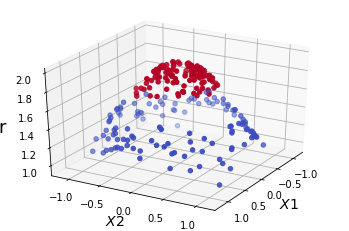

In [12]:
#  die Daten von oben in einem 3D-Diagramm veranschaulichen
#
# mit dem Kernel-trick lassen sich die Daten einfach separieren
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
r = exp(-(X)**2).sum(1)
#
ax.scatter(X[:,0], X[:,1], r, c=y, cmap=plt.cm.coolwarm)
ax.view_init(elev=30, azim=30)
ax.set_xlabel('$X1$', fontsize=14)
ax.set_ylabel('$X2$', fontsize=14)
ax.set_zlabel('r', fontsize=18)
#

**6.3** <br>
SVM mit rbf-Kernel und verschiedenen gamma-Werten.

Datensatzparameter ([make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles)):
- nSamples = 250 $\quad$ Gesamtzahl der generierten Punkte.
- Rauschen = 0,1 $\qquad$ Standardabweichung des zu den Daten hinzugefügten Gaußschen Rauschens.
- Faktor = 0,4 $\qquad$Skalierungsfaktor zwischen innerem und äußerem Kreis. $0<factor<1$

Modellparameter ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)):
- Kernel = 'rbf'
- C = 100: $\quad$ Regularisierungsparameter. Die Stärke der Regularisierung ist umgekehrt proportional zu C. Muss streng positiv sein. Die Strafe ist eine quadratische l2-Strafe.
- degree = 3 $\quad$ Grad der Polynomkernfunktion ("Poly"). Von allen anderen Kerneln ignoriert.
- gamma = [0.8, 0.1] $\quad$ Kernel-Koeffizient für "rbf", "poly" und "sigmoid".

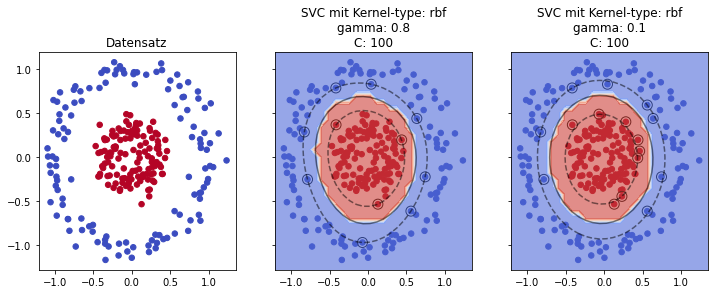

In [8]:
# code basiert auf folgenden Beispielen:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# und
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
from numpy import meshgrid, linspace, c_
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn import svm
import matplotlib.pyplot as plt
#
#
nSamples = 250
noise = 0.1
factor = 0.3
#
kernel = 'rbf'
C = 100
gamma = [0.8, 0.1]
#
# Datensatz mit nSample-Punkten erstellen
#
X, y = make_circles(n_samples=nSamples, factor=factor, noise=noise)
#
# 2 Instanzen einer polynomialen SVC erstellen und mit Daten ausstatten. Die Daten werden nicht skaliert, 
# da die Unterstützungsvektoren angezeigt werden sollen.
# 1. mit gamma[0]
clf_0 = svm.SVC(kernel=kernel, C=C, gamma = gamma[0])
clf_0.fit(X, y)
# 2. mit gamma[1]
clf_1 = svm.SVC(kernel=kernel, C=C, gamma = gamma[1])
clf_1.fit(X, y)
#
#
nCols = 3 # Anzahl der Diagramme in einer Reihe
fig, ax = plt.subplots(ncols=nCols, nrows=1, figsize=(12,4), sharey='all')
#
# ursprünglichen Datensatz in allen Diagrammen darstellen
#
for i in range(nCols):
    ax[i].scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.coolwarm)

# Netzgitter zum Auswerten des Models erstellen
# Gittergröße: (h,h)
#
h = 30
#
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
xx, yy = meshgrid(linspace(xlim[0], xlim[1], h), linspace(ylim[0], ylim[1], h))
#
# Eintscheidungsfunktion und Ränder aus dem Model erhalten
#
Z0 = clf_0.decision_function(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z1 = clf_1.decision_function(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#
#
# Entscheidungsgrenzen und Ränder darstellen
#
ax[1].contour(xx, yy, Z0, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax[2].contour(xx, yy, Z1, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax[1].scatter(clf_0.support_vectors_[:, 0], clf_0.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
ax[2].scatter(clf_1.support_vectors_[:, 0], clf_1.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#
# Entscheidungsgrenze als farbigen Bereich darstellen. Dazu weisen wir jeder Entscheidungsgrenze eine Farbe
# im Netzgitter zu
ca_0 = clf_0.predict(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ca_1 = clf_1.predict(c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#
# die zugewiesene Farbe jedes Punktes in ein Farbdiagramm setzen
ax[1].contourf(xx, yy, ca_0, cmap=plt.cm.coolwarm, alpha=0.6)
ax[2].contourf(xx, yy, ca_1, cmap=plt.cm.coolwarm, alpha=0.6)
#
#
ax[0].set_title("Datensatz")
ax[1].set_title("SVC mit Kernel-type: " + str(kernel) + "\ngamma: " + str(gamma[0]) +"\nC: " + str(C))
ax[2].set_title("SVC mit Kernel-type: " + str(kernel) + "\ngamma: " + str(gamma[1]) +"\nC: " + str(C))
#
plt.show()

Copyright © 2020 IUBH Internationale Hochschule